# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, I will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data



In [1]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

My challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.



#### Preparing Data
Here we will first check for any missing values and outliers. 
We will also identify any duplicates.
We will then change the formats of certain column such as the Transaction date to make it easier to work with


In [2]:
print(data.size)  # 2898 rows
print(data.isnull().sum())  # no missing Values
data = data.drop_duplicates()
print(data.size)  # 2898 rows, no duplicate rows


2898
transaction_date            0
house_age                   0
transit_distance            0
local_convenience_stores    0
latitude                    0
longitude                   0
price_per_unit              0
dtype: int64
2898


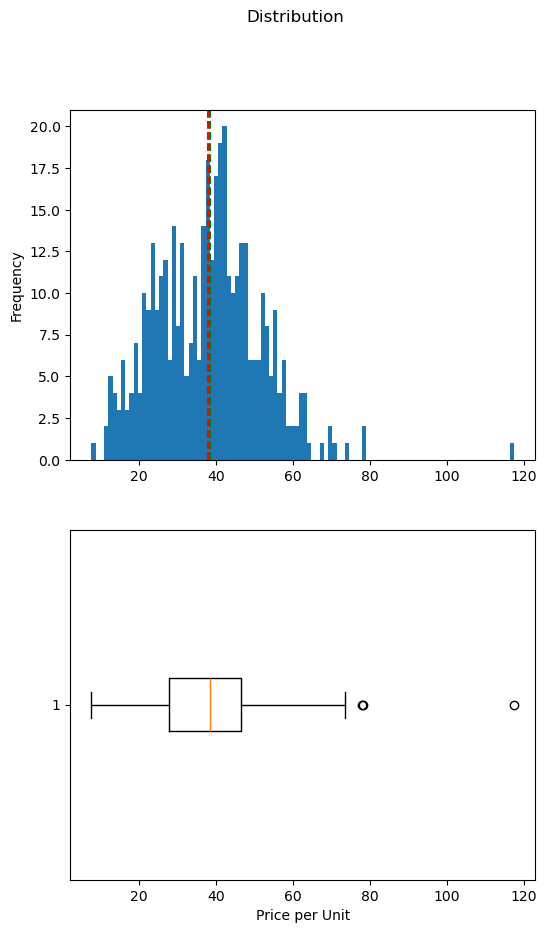

In [3]:
# View the distribution of the data

import pandas as pd
import matplotlib.pyplot as plt

def distribution(label):     
    '''
     This is a function that takes a set of datapoints as the inputs
     and returns a histogram and boxplots of those data
     points representing their distributions.
     '''
     
    fig, ax = plt.subplots(2,1, figsize=(6,10))
    
    ax[0].hist(label,bins=100)
    ax[0].set_ylabel('Frequency')
    ax[0].axvline(label.mean(), color = 'red', linestyle = '--')
    ax[0].axvline(label.median(), color = 'green', linestyle = '--')

    ax[1].boxplot(label, vert  = False)
    ax[1].set_xlabel('Price per Unit')
    
    fig.suptitle('Distribution')
    fig.show()

distribution(data['price_per_unit'])

As we see a couple of oitliers we will remove them to improve model accuracy

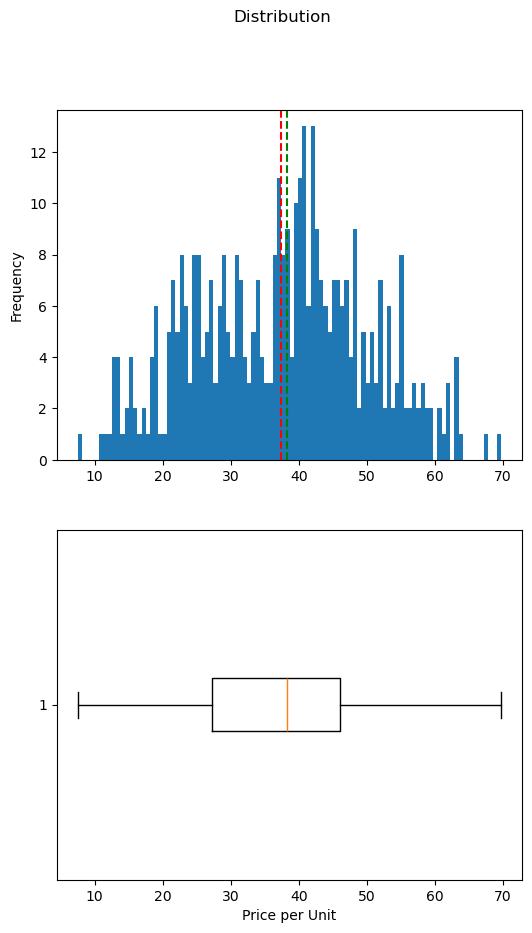

In [4]:
# Removing outliers

data = data[data['price_per_unit']<70]

distribution(data['price_per_unit'])

In [5]:
# Changing format of the Date column

data['Year'] = data['transaction_date'].astype(int)    #isolates the integer part of the date i.e the year
data['Month'] = ((data['transaction_date']-data['Year']) * 12 + 1).astype(int)   #multiply the decimal by 12 and then add 1 since January is the first month

#### Exploratory Data Analysis
In this section, we will explore the data to identify trends, patterns, and correlations between each feature and the price per unit using various visualization techniques. This analysis will help us:

Identify less predictive or uncorrelated features, allowing us to refine our feature selection for model building.
Formulate preliminary hypotheses about the relationships within the data, which can guide further analysis and model development.
By understanding the data's structure and relationships, we can make more informed decisions during the modeling process.
We will explore the following relation ships
- Transaction date vs average ppu (both for date continuous and discrete(months and years seperately))
- house age vs ppu (scatter plot)
- tranist distrance vs ppu (scatter plot)
- local convinience stores vs average ppu (bargraph)
- latitude and longitude vs ppu (seperately via scatter plot or together via heatmap?) 

transaction_date
2013.417    57
2013.500    47
2013.083    46
2012.917    38
2013.250    31
2012.833    30
2012.667    30
2013.000    28
2012.750    27
2013.333    27
2013.167    25
2013.583    22
Name: count, dtype: int64


/tmp/ipykernel_1075/499310914.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([data.loc[data['Year'] == y, 'price_per_unit'] for y in unique_years], labels=unique_years)
/tmp/ipykernel_1075/499310914.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([data.loc[data['Month'] == m, 'price_per_unit'] for m in unique_months], labels=unique_months)
/tmp/ipykernel_1075/499310914.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[2].boxplot([data.loc[data['transaction_date']== t, 'price_per_unit'] for t in unique_dates], labels = unique_dates  )


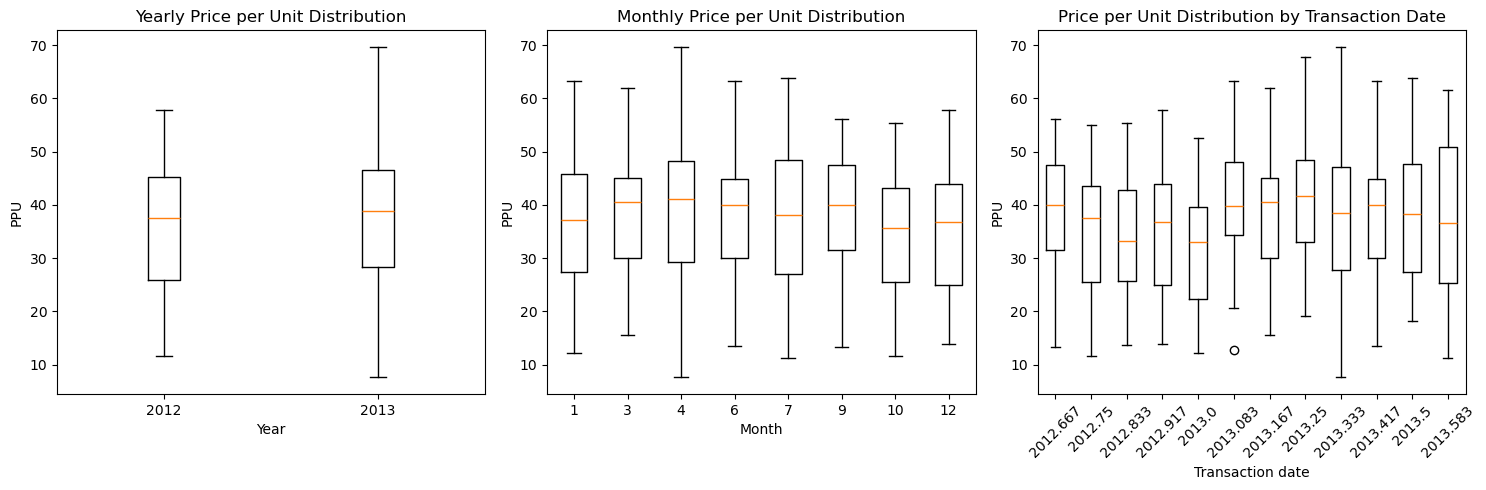

In [6]:
# Transaction Date vs PPU 

print(data['transaction_date'].value_counts())   #since there are only few dates where more of the trnsactions took place we will split the date into month and year and observe trends treating them as discrete variables

unique_years = sorted(data['Year'].unique())  
unique_months = sorted(data['Month'].unique())
unique_dates = sorted(data['transaction_date'].unique())

# Create subplots for Yearly and Monthly Boxplots
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Yearly Boxplot
ax[0].boxplot([data.loc[data['Year'] == y, 'price_per_unit'] for y in unique_years], labels=unique_years)
ax[0].set_title('Yearly Price per Unit Distribution')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('PPU')

# Monthly Boxplot
ax[1].boxplot([data.loc[data['Month'] == m, 'price_per_unit'] for m in unique_months], labels=unique_months)
ax[1].set_title('Monthly Price per Unit Distribution')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('PPU')

ax[2].boxplot([data.loc[data['transaction_date']== t, 'price_per_unit'] for t in unique_dates], labels = unique_dates  )
ax[2].set_title('Price per Unit Distribution by Transaction Date')
ax[2].set_xlabel('Transaction date')
ax[2].set_ylabel('PPU')

plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()



house_age
0.0     14
13.6     7
16.2     6
13.3     6
16.4     6
        ..
18.3     1
42.7     1
37.1     1
26.8     1
7.6      1
Name: count, Length: 233, dtype: int64


Text(0, 0.5, 'PPU')

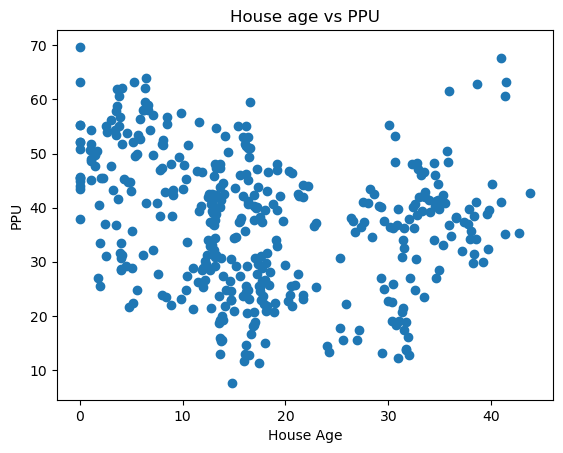

In [7]:
# house age vs PPU
print(data['house_age'].value_counts())   #continuous

plt.scatter(data['house_age'], data['price_per_unit'])
plt.title('House age vs PPU')
plt.xlabel('House Age')
plt.ylabel('PPU')      


transit_distance
289.32480     13
90.45606      11
492.23130      9
104.81010      8
1360.13900     8
              ..
330.08540      1
515.11220      1
1962.62800     1
4527.68700     1
319.07080      1
Name: count, Length: 256, dtype: int64


Text(0, 0.5, 'PPU')

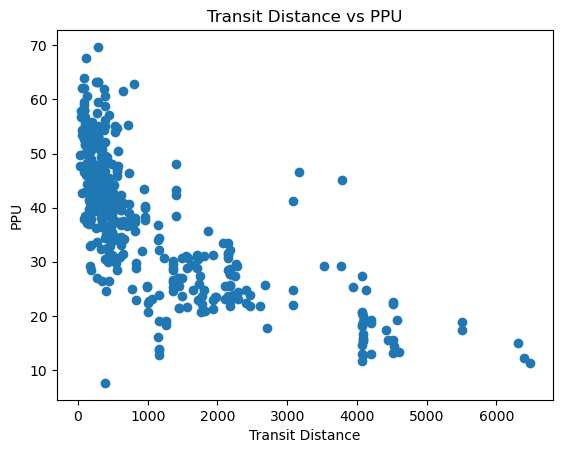

In [8]:
# transit distance vs PPU
print(data['transit_distance'].value_counts())   #continuous

plt.scatter(data['transit_distance'], data['price_per_unit'])
plt.title('Transit Distance vs PPU')
plt.xlabel('Transit Distance')
plt.ylabel('PPU')      



local_convenience_stores
5     67
0     67
3     46
1     45
6     34
7     31
4     31
8     30
2     24
9     23
10    10
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

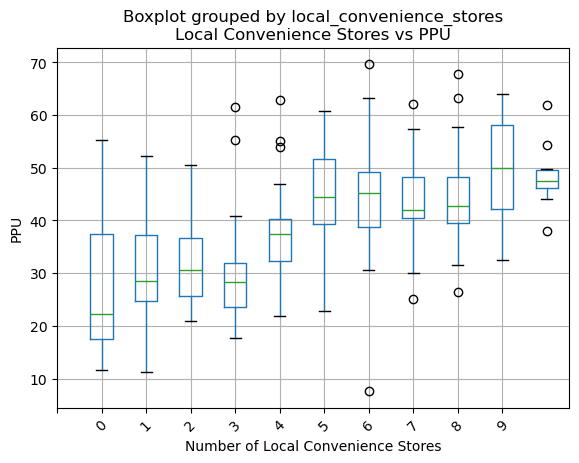

In [9]:
# local convinience sotres vs PPU

print(data['local_convenience_stores'].value_counts())   #discrete

plt.figure(figsize=(10, 6))
data.boxplot(column='price_per_unit', by='local_convenience_stores')

plt.title('Local Convenience Stores vs PPU')
plt.xlabel('Number of Local Convenience Stores')
plt.ylabel('PPU')

# Fix xticks
plt.xticks(sorted(data['local_convenience_stores'].unique()), rotation=45)

plt.show()

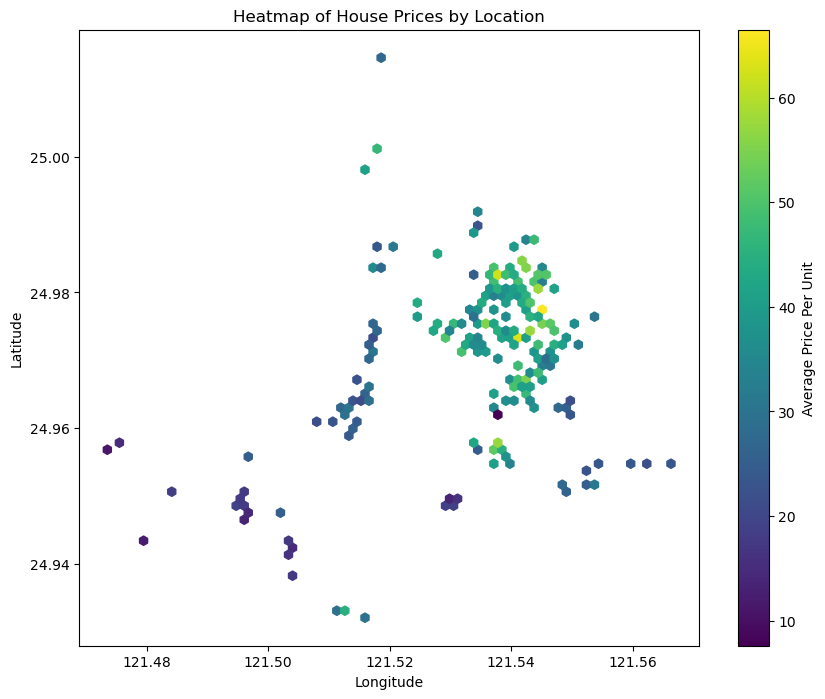

In [10]:
# Lattitude and Longitude vs ppu
import numpy as np

plt.figure(figsize=(10,8))

heatmap = plt.hexbin(    # creates a hexagonal binning plot - we dont use imshow grid since we have scattered points and not a copmlete grid of data
    data['longitude'],
    data['latitude'],
    gridsize = 70, 
    C=data['price_per_unit'], 
    cmap = 'viridis', 
    reduce_C_function=np.mean)     #we do this to specify what aggregate function we want to use for multiple data sets falling in the same bin

color_bar = plt.colorbar(heatmap)
color_bar.set_label('Average Price Per Unit')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Heatmap of House Prices by Location')

plt.show()

**Analysis**
- Transaction date: there is no significant impact on year, month or date to the distributions of the prices per unit - we can consider imitting this from our data
- House age: we observe weak negative correlation;  younger houses have greater variation in prices
- Transit distance: strong weak correlation, the variation in prices is decreases as transit distance increases, as the prices decrease
- Number of Convinience Stores: the prices increase, with lower spread as the number of local convinience stores increase
- Lattitude & Longitude: the prices increase as move to area with lattitude 24.96-24.98 and longitude 121.52-121.54 


#### Train the Model - Regression models

This section compares Linear Regression, Lasso, and Ridge models using 10-fold cross-validation to assess their performance.

We first remove non-predictive columns like transaction_date, Year, and Month. Since Lasso and Ridge require standardized features, we apply StandardScaler() before fitting them.

Each model is evaluated using 10-fold cross-validation, where we calculate the Root Mean Squared Error (RMSE) for each fold and compute the average RMSE to compare performance. A lower RMSE indicates better predictive accuracy.

Lasso can be useful for feature selection by shrinking some coefficients to zero.
Ridge helps handle multicollinearity by applying L2 regularization.
Linear Regression might be less stable if features are highly correlated

In [11]:
# Non-Pipeline method

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Define features and label, remove any non-predictive columns
X = data.drop(columns= ['price_per_unit', 'transaction_date', 'Year', 'Month'])
y = data['price_per_unit']

# Standardize features for Ridge and Lasso
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


model_list = [LinearRegression(), Lasso(), Ridge(alpha=1.0)]
datasetX = [X, X_scaled, X_scaled]   # Only Ridge & Lasso should use scaled data

# Perform cross-validation and compute RMSE for each model
for i, model in enumerate(model_list):
    scores = cross_val_score(model, datasetX[i], y, cv = 10, scoring = 'neg_mean_squared_error')
    rmse = np.sqrt(-scores)
    print(f'Model : {model.__class__.__name__}\nTest RMSE per fold : {rmse}\nAverage RMSE : {rmse.mean():.2f}\n')



Model : LinearRegression
Test RMSE per fold : [6.87554697 7.39355943 8.69824533 9.80156046 5.92594524 6.1156371
 7.64834447 6.88704772 7.25076921 8.56971288]
Average RMSE : 7.52

Model : Lasso
Test RMSE per fold : [6.87428204 7.95210046 9.1732066  9.44121114 5.90761483 6.56901781
 7.90915129 7.03077308 7.36109203 8.6325731 ]
Average RMSE : 7.69

Model : Ridge
Test RMSE per fold : [6.87156626 7.39634919 8.69727365 9.80104081 5.92657238 6.11356799
 7.64594511 6.88542949 7.25289419 8.56978146]
Average RMSE : 7.52



In [12]:
# Pipeline method
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np


# create a dictionary model which contains the model name and its respective pipeline method
model = {
    "Linear Regression" : Pipeline([
        ('model', LinearRegression())
    ]),
    "Lasso Regression" : Pipeline([
        ('scaler', StandardScaler()),
        ('model', Lasso())
    ]),
    "Ridge Regression" : Pipeline([
        ('scaler', StandardScaler()),
        ('model', Ridge())
    ])
}  

# Perform cross-validation and compute RMSE for each model
for name, pipeline in model.items():
    scores = cross_val_score(pipeline, X, y, cv = 10, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-scores)

    print(f"Model: {name}")
    print(f"Average RMSE: {rmse.mean():.2f}\n")

Model: Linear Regression
Average RMSE: 7.52

Model: Lasso Regression
Average RMSE: 7.69

Model: Ridge Regression
Average RMSE: 7.52



#### Train the Model - RandomForestRegressor Pipeline

We begin by identifying numeric and categorical features. Numeric features are imputed with the mean and standardized using StandardScaler(). Categorical features are imputed with the most frequent value and encoded using OrdinalEncoder().

A ColumnTransformer applies the appropriate preprocessing steps to each feature type. This preprocessed data is then fed into a Random Forest Regressor within a full Pipeline.

As before, we evaluate the pipeline using 10-fold cross-validation, calculating Root Mean Squared Error (RMSE) as the performance metric. The pipeline automates data preprocessing and model training, ensuring a streamlined and reproducible workflow.

In [20]:

# Define feature indices
numeric_features = [0,1,3,4]
categorical_features = [2]

# Numeric pipeline
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())  # Fixed typo from 'scalar' to 'scaler'
])

# Categorical pipeline
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder())  # Instantiate the encoder properly
])

# Preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Full pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Cross-validation
scores = cross_val_score(model_pipeline, X, y, cv=10, scoring='neg_mean_squared_error')

# Calculate RMSE
rmse = np.sqrt(-scores)


print("Model: Random Forest Regression")
print(f"Average RMSE: {rmse.mean()}")


Model: Random Forest Regression
Average RMSE: 6.206492740912891


#### Evaluate Model

This code evaluates a trained regression model using key performance metrics. It splits the dataset into training and testing sets, fits the model, and predicts target values. The Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² score are calculated to assess model performance. Additionally, a scatter plot of actual vs. predicted values is generated, with a best-fit line to visualize the model's accuracy. Via Previous analysis, we have taken our best model to be the RandomForest Regressor since that returned the lowest RMSE.

MSE: 47.14554911975756
RMSE: 6.8662616553520275
R2: 0.7139184002661632


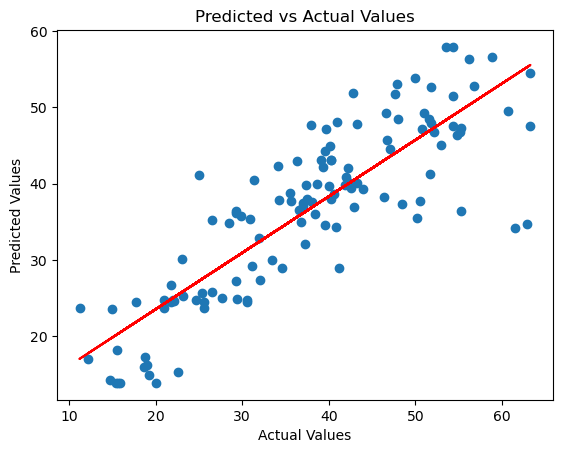

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

best_model = model_pipeline

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

#Evaluation Metrics

mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)
rmse = np.sqrt(mse)
print('RMSE:', rmse)
r2 = r2_score(y_test, y_pred)
print('R2:', r2)

# Actual vs Predicted Plot

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color = 'red')
plt.show()

## Use the Trained Model

I now save my trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [15]:
# Your code to use the trained model

import joblib

filename = './house_prices.pkl'
joblib.dump(best_model, filename)

loaded_model = joblib.load(filename)
X_new = np.array([[16.2,289.3248,5,24.98203,121.54348],
                  [13.6,4082.015,0,24.94155,121.5038]])

y_new = loaded_model.predict(X_new)
print(f'Prediction: \n {list(np.round(y_new,2))}')

Prediction: 
 [50.78, 13.89]


/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
